# Lung Cancer Predictive Model

## Overview

### Goal
This python code analyzes data of a fictional telco company that provided home phone and internet services to 7043 customers in California in Q3. The goal is build a classification model that could predict if a individual will have lung cancer or not. Below are the questions that the project answers.

* What are the distributions of each variable?
* What is the relationship of each variable with PLUMONARY_DISEASE?

### Data
The initial dataset contains 5000 rows, each representing a person, and 18 columns.  
Source: https://www.kaggle.com/datasets/shantanugarg274/lung-cancer-prediction-dataset  

#### Variables
* AGE
* GENDER
* SMOKING
* FINGER_DISCOLORATION
* MENTAL_STRESS
* EXPOSURE_TO_POLLUTION
* LONG_TERM_ILLNESS
* ENERGY_LEVEL
* IMMUNE_WEAKNESS
* BREATHING_ISSUE
* ALCOHOL_CONSUMPTION
* THROAT_DISCOMFORT
* OXYGEN_SATURATION
* CHEST_TIGHTNESS
* FAMILY_HISTORY
* SMOKING_FAMILY_HISTORY
* STRESS_IMMUNE
* PULMONARY_DISEASE

### Methodology
In order to create the best predictive model, 4 classification models are built: Logistic Regression (2), K-Nearest Neighbors (KNN) and Support Vector Machines (SVM). GridSearchCV is used to choose the optimal parameters in all models except for the first logistic regression model. Only 10% is used for the test set since the dataset is big. The dataset was scaled before running the models.

### Findings
The ages of participants go from 30 to 84 years with a mean of 57 years. Having lung cancer seems to be equally distributed across ages.  
Having lung cancer seems to be equally distributed across oxygen saturation.  
Energy level goes from 23.25 to 83.04 with a mean of 55.03. Participants with higher energy levels seem to have more prone to having lung cancer.  
All variables in the dataset are binary except for age, energy level and oxygen saturation.  
50% of participants are males and 50% are females. Lung cancer seems to be equally distributed across genders.  
67% of participants are smokers. Smokers seem to have much more lung cancer than non-smokers.  
60% of participants have discolored fingers. There doesn't seem to be a relationship between finger discoloration and lung cancer.  
54% of participants have mental stress. Mental stress seems to be positively correlated with having lung cancer.  
About half of participants have been exposed to pollution. Being exposed to pollution seems to increase the risk of having lung cancer.  
Only 44% of the participants have a long-term illness. Having a long-term illness seems to be positively correlated with having lung cancer.  
39% of participants have an immune weakness. Having an immune weakness seems to be positively correlated with having lung cancer.  
80% of participants have breathing issues. Having breathing issues seems to be positively correlated with having lung cancer.  
Only 35% of participants consume alcohol.  
70% of participants have throat discomfort. Having throat discomfort seems to be positively correlated with having lung cancer.  
The majority of participants (60%) have experience tightness.  
Only 30% of participants have a family history of lung cancer. Having a family history of lung cancer seems to be positively correlated with having lung cancer.  
Having a family history of smoking seems to be positively correlated with having lung cancer.  
41% of participants have lung cancer.  

According to the correlation coefficients, alcohol consumption is the weakest predictor for having lung cancer. Inversely, smoking is the strongest predictor for having lung cancer.

The logistic regression run with and without give the same results. They give an overall accuracy of 91%.  
The KNN model has an overall accuracy of 88%.  
The SVM model has an overall accuracy of 91%.  

In [2138]:
# General Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline 
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer # Impute missing values using median

# Binary Classification
from sklearn.metrics import (confusion_matrix, classification_report, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay,
accuracy_score, roc_curve, auc)
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D
from math import floor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR,LinearSVR, SVC
# from sklearn.svm_margin_plot import plot_svm_boundary

# Statistical Analysis
import scipy.stats as sc
import statistics
from scipy.stats import pearsonr, bernoulli, binom, poisson, expon, norm

# Regressions
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LassoCV, ElasticNetCV, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

# Time Series
from statsmodels.tsa.statespace.tools import diff #Diffrencing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima  
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import rmse # RMSE
from statsmodels.tsa.seasonal import seasonal_decompose # Seasonal Decomposition
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime # Datetime
from dateutil import parser # Datetime
import yfinance as yf # Datetime
from statsmodels.tsa.stattools import adfuller, kpss # ADF and KPSS

# PCA
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as sch
from sklearn import cluster, datasets
from sklearn.datasets import load_digits, fetch_lfw_people, fetch_lfw_people, fetch_openml
from matplotlib.image import imread
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS, LocallyLinearEmbedding, Isomap
from mpl_toolkits import mplot3d
from matplotlib import offsetbox
import matplotlib as mpl

# Miscellinious
from joblib import dump, load # Model deployment
import joblib

# SQL
import sqlite3

# Web Scraping
import requests
from bs4 import BeautifulSoup
import re

In [2140]:
# Import data
df = pd.read_csv('Lung Cancer Dataset.csv')
df

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,0,1,1,0,0,1,60.700696,1,1,1,1,94.012495,0,1,1,0,YES
4996,80,0,1,1,1,1,1,50.751741,0,1,1,1,94.394968,0,0,0,0,YES
4997,51,1,0,0,1,0,0,61.063496,1,0,0,0,98.108901,0,0,0,1,NO
4998,76,1,0,1,0,0,0,48.662872,0,1,0,1,95.577773,1,0,0,0,NO


In [2142]:
# Exploration
df.head()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES


In [2144]:
df.tail()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
4995,32,0,1,1,0,0,1,60.700696,1,1,1,1,94.012495,0,1,1,0,YES
4996,80,0,1,1,1,1,1,50.751741,0,1,1,1,94.394968,0,0,0,0,YES
4997,51,1,0,0,1,0,0,61.063496,1,0,0,0,98.108901,0,0,0,1,NO
4998,76,1,0,1,0,0,0,48.662872,0,1,0,1,95.577773,1,0,0,0,NO
4999,33,0,1,0,0,1,1,58.245188,0,1,1,1,94.206934,1,0,0,0,NO


In [2146]:
df.sample(10)

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
484,72,1,1,1,0,0,1,46.230167,0,1,0,0,96.876376,0,0,0,0,NO
748,35,1,1,1,0,0,0,54.957610,0,1,0,1,95.421278,0,1,1,0,YES
4492,66,0,1,0,1,1,0,57.081433,0,1,0,1,94.525062,0,1,1,0,YES
4217,37,0,1,0,1,0,1,41.201324,0,0,0,0,95.566537,1,1,1,0,YES
1724,55,1,1,0,0,0,1,69.288291,1,0,0,0,96.964069,1,0,0,0,NO
935,43,0,1,1,0,1,1,57.792564,0,1,1,1,95.773456,1,0,0,0,YES
4853,51,0,1,1,0,1,0,40.645192,0,0,0,1,94.877795,1,0,0,0,NO
1436,78,1,1,0,1,1,0,49.070360,0,1,1,1,92.585625,1,0,0,0,YES
4310,83,0,0,1,1,0,0,55.122668,1,1,0,1,96.572599,0,1,0,1,NO
1439,61,0,0,0,0,1,0,30.432088,0,1,1,1,98.063987,1,0,0,0,NO


In [2148]:
df.describe()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE
count,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,57.222800,0.501200,0.666400,0.6012,0.539800,0.516000,0.439200,55.032043,0.394800,0.80040,0.354200,0.698200,94.991029,0.600600,0.301800,0.204000,0.209600
std,15.799224,0.500049,0.471546,0.4897,0.498463,0.499794,0.496339,7.913083,0.488857,0.39974,0.478318,0.459085,1.481048,0.489824,0.459085,0.403009,0.407064
min,30.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,23.258308,0.000000,0.00000,0.000000,0.000000,89.923133,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,49.440685,0.000000,1.00000,0.000000,0.000000,93.973176,0.000000,0.000000,0.000000,0.000000
50%,57.000000,1.000000,1.000000,1.0000,1.000000,1.000000,0.000000,55.050421,0.000000,1.00000,0.000000,1.000000,94.974073,1.000000,0.000000,0.000000,0.000000
75%,71.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,60.323320,1.000000,1.00000,1.000000,1.000000,95.989272,1.000000,1.000000,0.000000,0.000000
max,84.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,83.046971,1.000000,1.00000,1.000000,1.000000,99.795786,1.000000,1.000000,1.000000,1.000000


In [2150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

In [2152]:
# Check for missing values
df.isnull().sum()

AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64

## Distributions of Variables

In [2155]:
# Find all unique values in the 'GENDER' column
df['GENDER'].unique()

array([1, 0], dtype=int64)

In [2157]:
# Gender distribution
df['GENDER'].value_counts()

GENDER
1    2506
0    2494
Name: count, dtype: int64

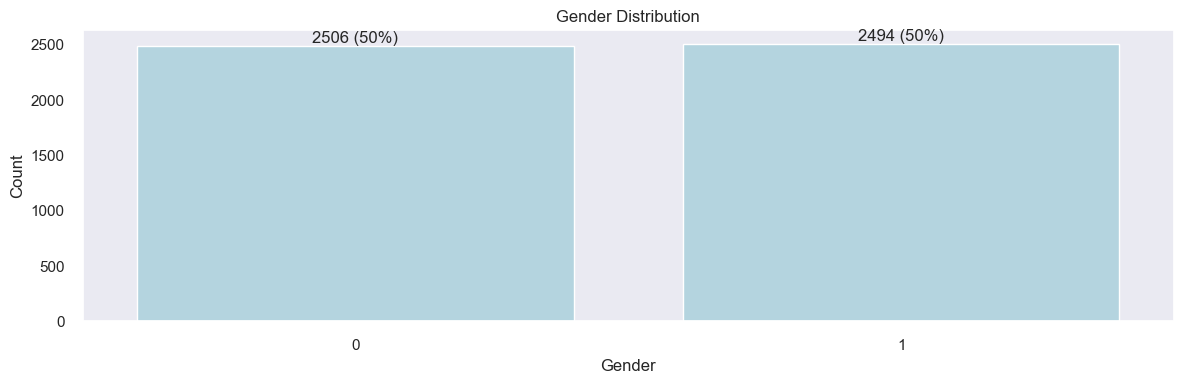

In [2159]:
# Visualization of GENDER
ax=sns.countplot(data=df, x='GENDER', color='lightblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
abs_values = df['GENDER'].value_counts(ascending=False)
rel_values = df['GENDER'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.tight_layout();

In [2161]:
# Find all unique values in the 'SMOKING' column
df['SMOKING'].unique()

array([1, 0], dtype=int64)

In [2163]:
# SMOKING distribution
df['SMOKING'].value_counts()

SMOKING
1    3332
0    1668
Name: count, dtype: int64

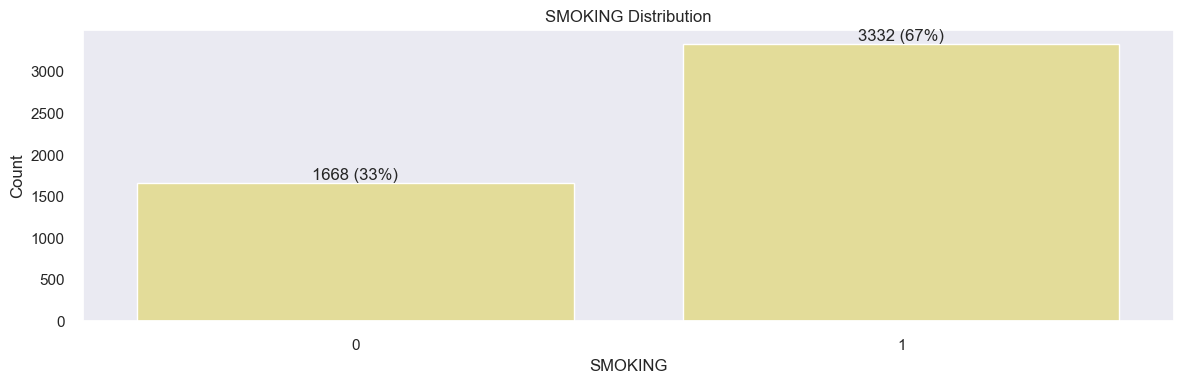

In [2165]:
# Visualization of SMOKING
ax=sns.countplot(data=df, x='SMOKING', color='khaki')
plt.title('SMOKING Distribution')
plt.xlabel('SMOKING')
plt.ylabel('Count')
abs_values = df['SMOKING'].value_counts(ascending=True)
rel_values = df['SMOKING'].value_counts(ascending=True, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.tight_layout();

In [2167]:
# Find all unique values in the 'FINGER_DISCOLORATION' column
df['FINGER_DISCOLORATION'].unique()

array([1, 0], dtype=int64)

In [2169]:
# FINGER_DISCOLORATION distribution
df['FINGER_DISCOLORATION'].value_counts()

FINGER_DISCOLORATION
1    3006
0    1994
Name: count, dtype: int64

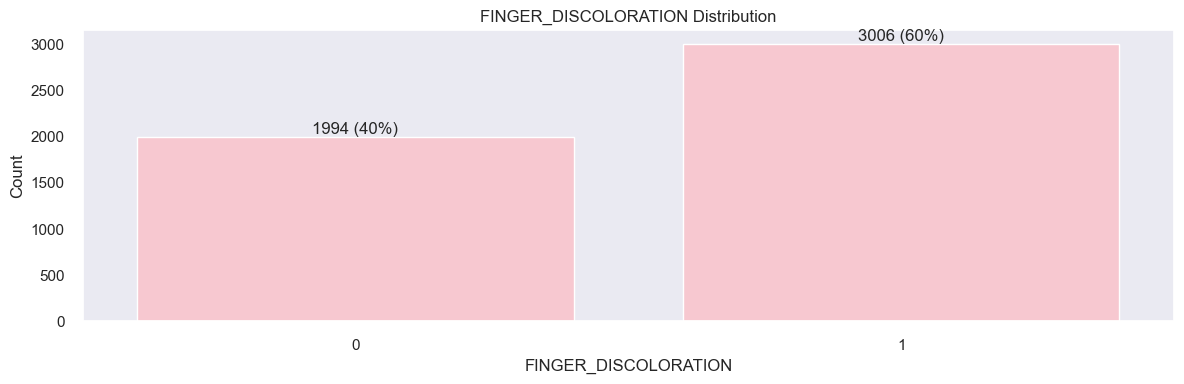

In [2171]:
# Visualization of FINGER_DISCOLORATION
ax=sns.countplot(data=df, x='FINGER_DISCOLORATION', color='pink')
plt.title('FINGER_DISCOLORATION Distribution')
plt.xlabel('FINGER_DISCOLORATION')
plt.ylabel('Count')
abs_values = df['FINGER_DISCOLORATION'].value_counts(ascending=True)
rel_values = df['FINGER_DISCOLORATION'].value_counts(ascending=True, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.tight_layout();

In [2173]:
# Find all unique values in the 'MENTAL_STRESS' column
df['MENTAL_STRESS'].unique()

array([1, 0], dtype=int64)

In [2175]:
# MENTAL_STRESS distribution
df['MENTAL_STRESS'].value_counts()

MENTAL_STRESS
1    2699
0    2301
Name: count, dtype: int64

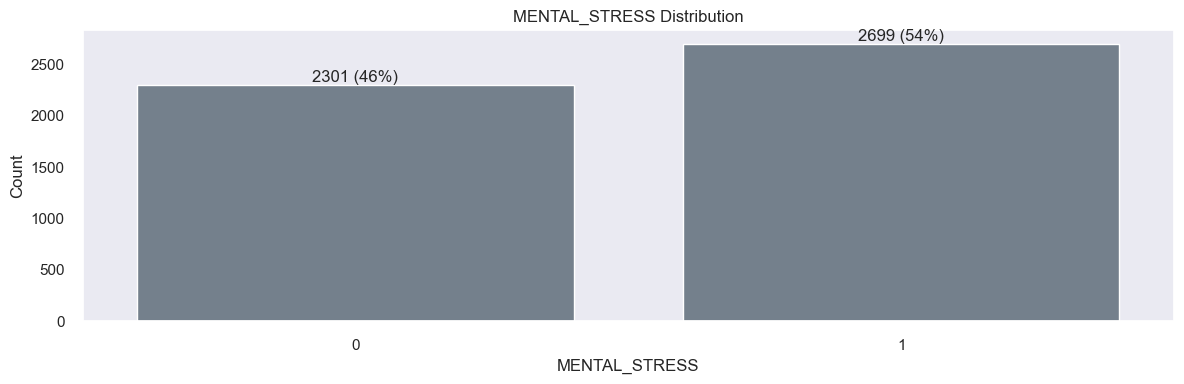

In [2177]:
# Visualization of MENTAL_STRESS
ax=sns.countplot(data=df, x='MENTAL_STRESS', color='slategray')
plt.title('MENTAL_STRESS Distribution')
plt.xlabel('MENTAL_STRESS')
plt.ylabel('Count')
abs_values = df['MENTAL_STRESS'].value_counts(ascending=True)
rel_values = df['MENTAL_STRESS'].value_counts(ascending=True, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.tight_layout();

In [2179]:
# Find all unique values in the 'LONG_TERM_ILLNESS' column
df['LONG_TERM_ILLNESS'].unique()

array([0, 1], dtype=int64)

In [2181]:
# LONG_TERM_ILLNESS distribution
df['LONG_TERM_ILLNESS'].value_counts()

LONG_TERM_ILLNESS
0    2804
1    2196
Name: count, dtype: int64

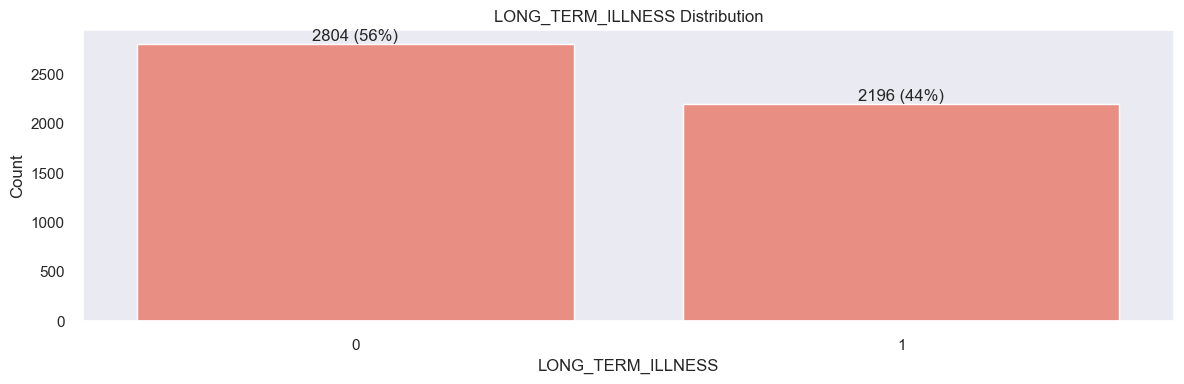

In [2183]:
# Visualization of LONG_TERM_ILLNESS
ax=sns.countplot(data=df, x='LONG_TERM_ILLNESS', color='salmon')
plt.title('LONG_TERM_ILLNESS Distribution')
plt.xlabel('LONG_TERM_ILLNESS')
plt.ylabel('Count')
abs_values = df['LONG_TERM_ILLNESS'].value_counts(ascending=False)
rel_values = df['LONG_TERM_ILLNESS'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.tight_layout();

In [2185]:
# Find all unique values in the 'ENERGY_LEVEL' column
df['ENERGY_LEVEL'].unique()

array([57.83117781, 47.69483542, 59.57743507, ..., 61.06349616,
       48.66287201, 58.2451881 ])

In [2187]:
# Find all unique values in the 'IMMUNE_WEAKNESS' column
df['IMMUNE_WEAKNESS'].unique()

array([0, 1], dtype=int64)

In [2189]:
# IMMUNE_WEAKNESS distribution
df['IMMUNE_WEAKNESS'].value_counts()

IMMUNE_WEAKNESS
0    3026
1    1974
Name: count, dtype: int64

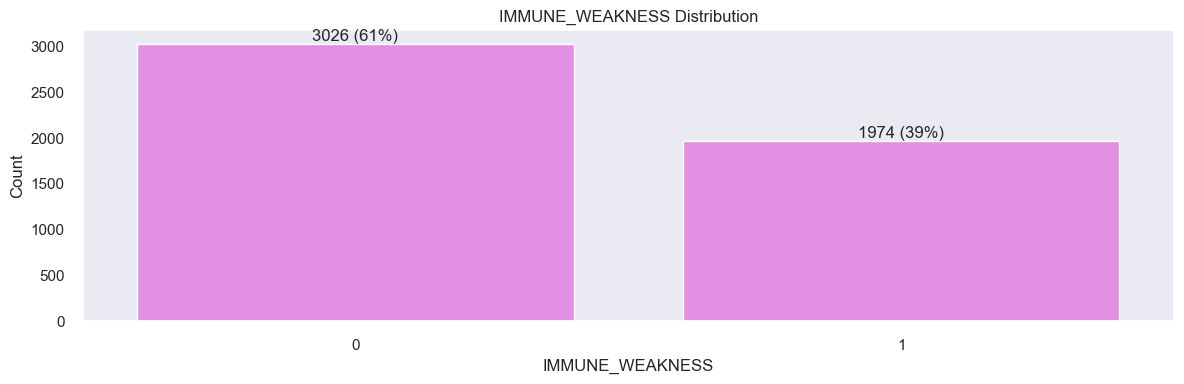

In [2191]:
# Visualization of IMMUNE_WEAKNESS
ax=sns.countplot(data=df, x='IMMUNE_WEAKNESS', color='violet')
plt.title('IMMUNE_WEAKNESS Distribution')
plt.xlabel('IMMUNE_WEAKNESS')
plt.ylabel('Count')
abs_values = df['IMMUNE_WEAKNESS'].value_counts(ascending=False)
rel_values = df['IMMUNE_WEAKNESS'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.tight_layout();

In [2193]:
# Find all unique values in the 'BREATHING_ISSUE' column
df['BREATHING_ISSUE'].unique()

array([0, 1], dtype=int64)

In [2195]:
# BREATHING_ISSUE distribution
df['BREATHING_ISSUE'].value_counts()

BREATHING_ISSUE
1    4002
0     998
Name: count, dtype: int64

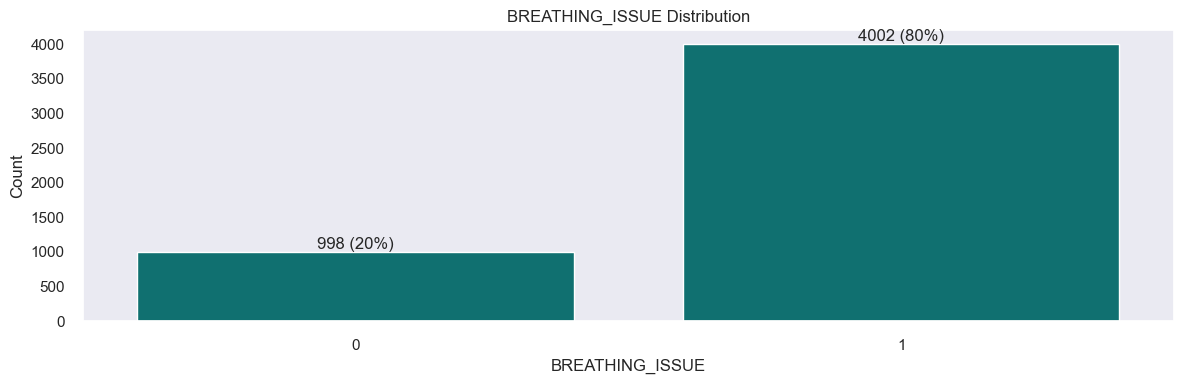

In [2197]:
# Visualization of BREATHING_ISSUE
ax=sns.countplot(data=df, x='BREATHING_ISSUE', color='teal')
plt.title('BREATHING_ISSUE Distribution')
plt.xlabel('BREATHING_ISSUE')
plt.ylabel('Count')
abs_values = df['BREATHING_ISSUE'].value_counts(ascending=True)
rel_values = df['BREATHING_ISSUE'].value_counts(ascending=True, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.tight_layout();

In [2199]:
# Find all unique values in the 'ALCOHOL_CONSUMPTION' column
df['ALCOHOL_CONSUMPTION'].unique()

array([1, 0], dtype=int64)

In [2201]:
# ALCOHOL_CONSUMPTION distribution
df['ALCOHOL_CONSUMPTION'].value_counts()

ALCOHOL_CONSUMPTION
0    3229
1    1771
Name: count, dtype: int64

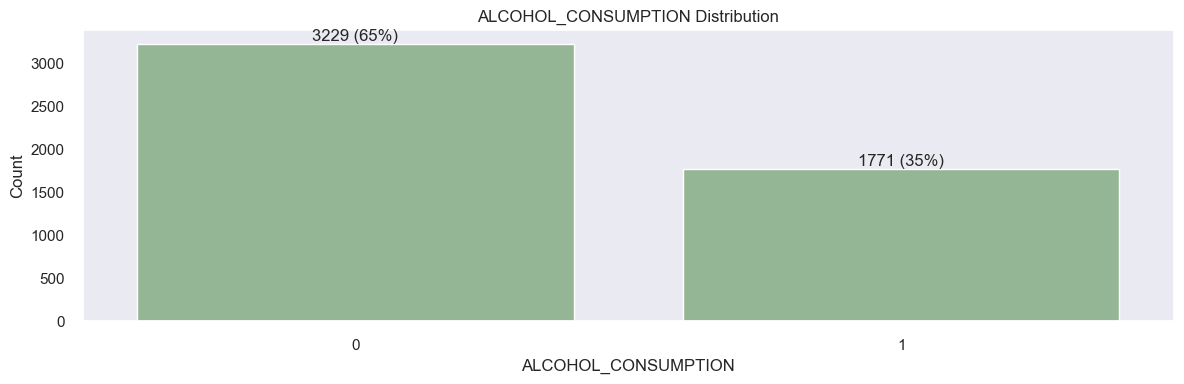

In [2203]:
# Visualization of ALCOHOL_CONSUMPTION
ax=sns.countplot(data=df, x='ALCOHOL_CONSUMPTION', color='darkseagreen')
plt.title('ALCOHOL_CONSUMPTION Distribution')
plt.xlabel('ALCOHOL_CONSUMPTION')
plt.ylabel('Count')
abs_values = df['ALCOHOL_CONSUMPTION'].value_counts(ascending=False)
rel_values = df['ALCOHOL_CONSUMPTION'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.tight_layout();

In [2205]:
# Find all unique values in the 'THROAT_DISCOMFORT' column
df['THROAT_DISCOMFORT'].unique()

array([1, 0], dtype=int64)

In [2207]:
# THROAT_DISCOMFORT distribution
df['THROAT_DISCOMFORT'].value_counts()

THROAT_DISCOMFORT
1    3491
0    1509
Name: count, dtype: int64

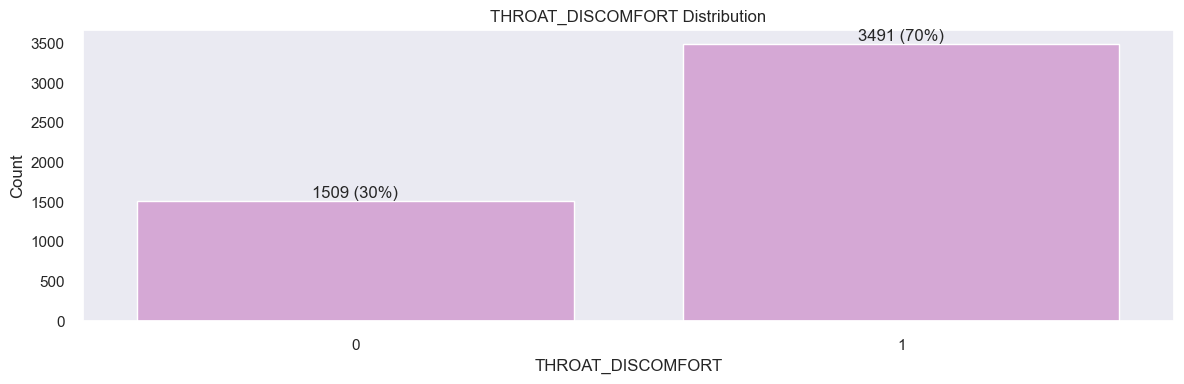

In [2209]:
# Visualization of THROAT_DISCOMFORT
ax=sns.countplot(data=df, x='THROAT_DISCOMFORT', color='plum')
plt.title('THROAT_DISCOMFORT Distribution')
plt.xlabel('THROAT_DISCOMFORT')
plt.ylabel('Count')
abs_values = df['THROAT_DISCOMFORT'].value_counts(ascending=True)
rel_values = df['THROAT_DISCOMFORT'].value_counts(ascending=True, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.tight_layout();

In [2211]:
# Find all unique values in the 'CHEST_TIGHTNESS' column
df['CHEST_TIGHTNESS'].unique()

array([1, 0], dtype=int64)

In [2213]:
# CHEST_TIGHTNESS distribution
df['CHEST_TIGHTNESS'].value_counts()

CHEST_TIGHTNESS
1    3003
0    1997
Name: count, dtype: int64

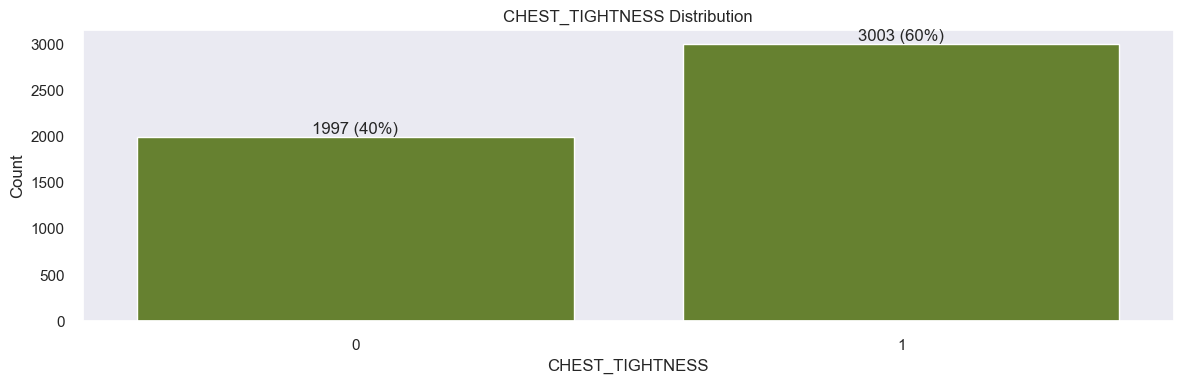

In [2215]:
# Visualization of CHEST_TIGHTNESS
ax=sns.countplot(data=df, x='CHEST_TIGHTNESS', color='olivedrab')
plt.title('CHEST_TIGHTNESS Distribution')
plt.xlabel('CHEST_TIGHTNESS')
plt.ylabel('Count')
abs_values = df['CHEST_TIGHTNESS'].value_counts(ascending=True)
rel_values = df['CHEST_TIGHTNESS'].value_counts(ascending=True, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.tight_layout();

In [2217]:
# Find all unique values in the 'EXPOSURE_TO_POLLUTION' column
df['EXPOSURE_TO_POLLUTION'].unique()

array([1, 0], dtype=int64)

In [2219]:
# EXPOSURE_TO_POLLUTION distribution
df['EXPOSURE_TO_POLLUTION'].value_counts()

EXPOSURE_TO_POLLUTION
1    2580
0    2420
Name: count, dtype: int64

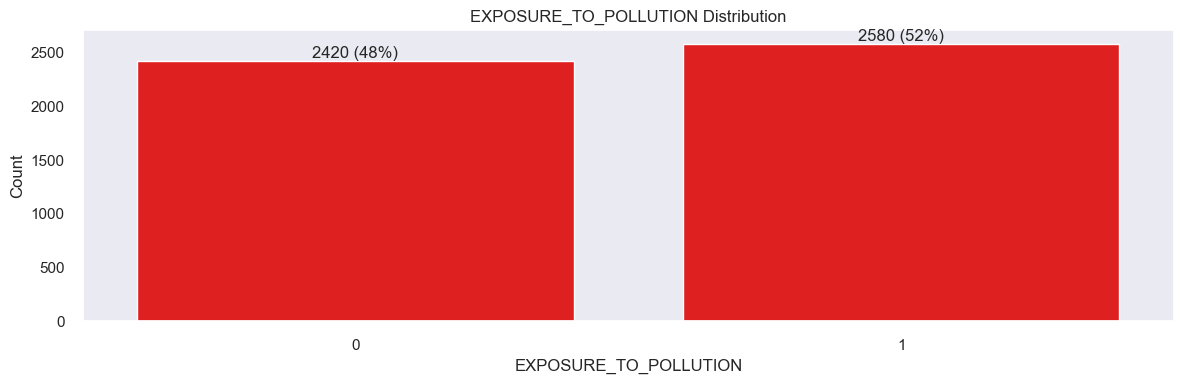

In [2221]:
# Visualization of EXPOSURE_TO_POLLUTION
ax=sns.countplot(data=df, x='EXPOSURE_TO_POLLUTION', color='red')
plt.title('EXPOSURE_TO_POLLUTION Distribution')
plt.xlabel('EXPOSURE_TO_POLLUTION')
plt.ylabel('Count')
abs_values = df['EXPOSURE_TO_POLLUTION'].value_counts(ascending=True)
rel_values = df['EXPOSURE_TO_POLLUTION'].value_counts(ascending=True, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.tight_layout();

In [2223]:
# Find all unique values in the 'FAMILY_HISTORY' column
df['FAMILY_HISTORY'].unique()

array([0, 1], dtype=int64)

In [2225]:
# FAMILY_HISTORY distribution
df['FAMILY_HISTORY'].value_counts()

FAMILY_HISTORY
0    3491
1    1509
Name: count, dtype: int64

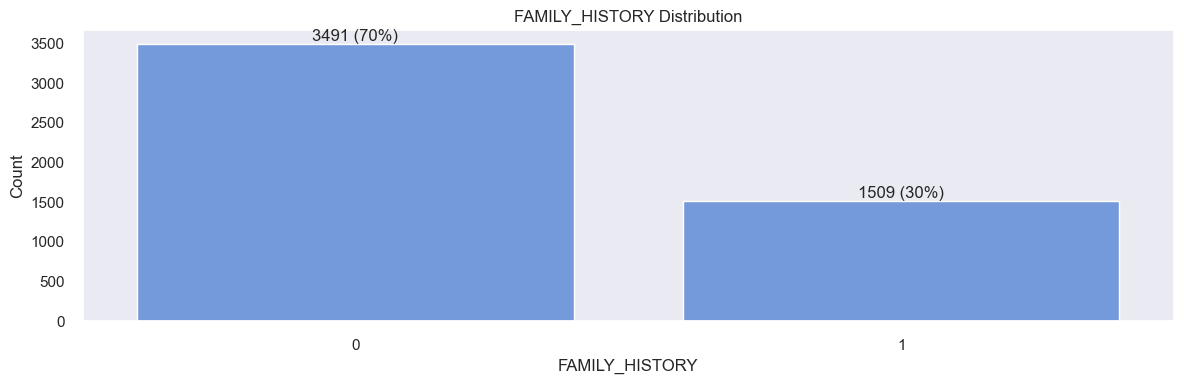

In [2227]:
# Visualization of FAMILY_HISTORY
ax=sns.countplot(data=df, x='FAMILY_HISTORY', color='cornflowerblue')
plt.title('FAMILY_HISTORY Distribution')
plt.xlabel('FAMILY_HISTORY')
plt.ylabel('Count')
abs_values = df['FAMILY_HISTORY'].value_counts(ascending=False)
rel_values = df['FAMILY_HISTORY'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.tight_layout();

In [2229]:
# Find all unique values in the 'SMOKING_FAMILY_HISTORY' column
df['SMOKING_FAMILY_HISTORY'].unique()

array([0, 1], dtype=int64)

In [2231]:
# SMOKING_FAMILY_HISTORY distribution
df['SMOKING_FAMILY_HISTORY'].value_counts()

SMOKING_FAMILY_HISTORY
0    3980
1    1020
Name: count, dtype: int64

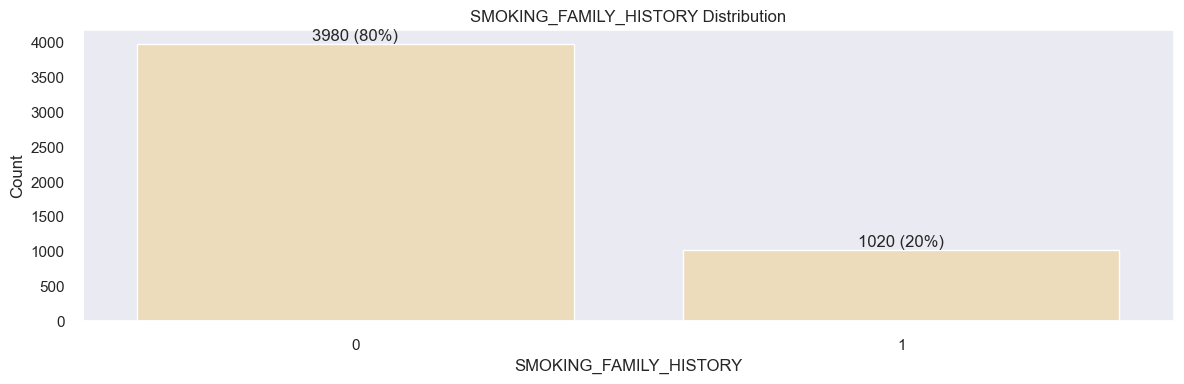

In [2233]:
# Visualization of SMOKING_FAMILY_HISTORY
ax=sns.countplot(data=df, x='SMOKING_FAMILY_HISTORY', color='wheat')
plt.title('SMOKING_FAMILY_HISTORY Distribution')
plt.xlabel('SMOKING_FAMILY_HISTORY')
plt.ylabel('Count')
abs_values = df['SMOKING_FAMILY_HISTORY'].value_counts(ascending=False)
rel_values = df['SMOKING_FAMILY_HISTORY'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.tight_layout();

In [2235]:
# Find all unique values in the 'STRESS_IMMUNE' column
df['STRESS_IMMUNE'].unique()

array([0, 1], dtype=int64)

In [2237]:
# STRESS_IMMUNE distribution
df['STRESS_IMMUNE'].value_counts()

STRESS_IMMUNE
0    3952
1    1048
Name: count, dtype: int64

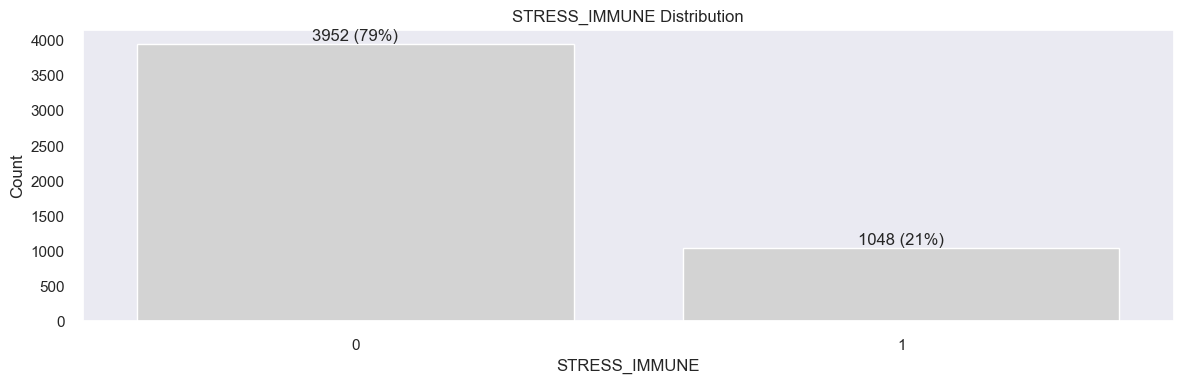

In [2239]:
# Visualization of STRESS_IMMUNE
ax=sns.countplot(data=df, x='STRESS_IMMUNE', color='lightgray')
plt.title('STRESS_IMMUNE Distribution')
plt.xlabel('STRESS_IMMUNE')
plt.ylabel('Count')
abs_values = df['STRESS_IMMUNE'].value_counts(ascending=False)
rel_values = df['STRESS_IMMUNE'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.tight_layout();

In [2241]:
# Find all unique values in the 'PULMONARY_DISEASE' column
df['PULMONARY_DISEASE'].unique()

array(['NO', 'YES'], dtype=object)

In [2243]:
# PULMONARY_DISEASE distribution
df['PULMONARY_DISEASE'].value_counts()

PULMONARY_DISEASE
NO     2963
YES    2037
Name: count, dtype: int64

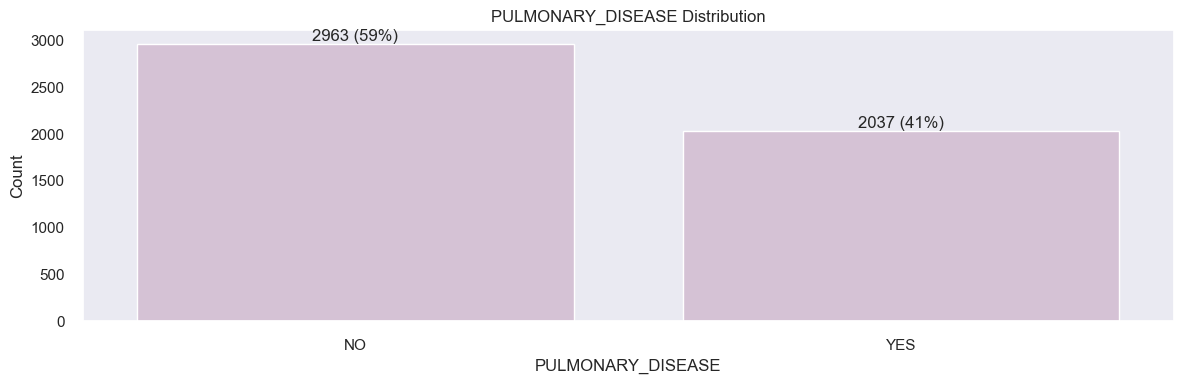

In [2245]:
# Visualization of PULMONARY_DISEASE
ax=sns.countplot(data=df, x='PULMONARY_DISEASE', color='thistle')
plt.title('PULMONARY_DISEASE Distribution')
plt.xlabel('PULMONARY_DISEASE')
plt.ylabel('Count')
abs_values = df['PULMONARY_DISEASE'].value_counts(ascending=False)
rel_values = df['PULMONARY_DISEASE'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.tight_layout();

## Predictive Variables vs. PULMONARY_DISEASE

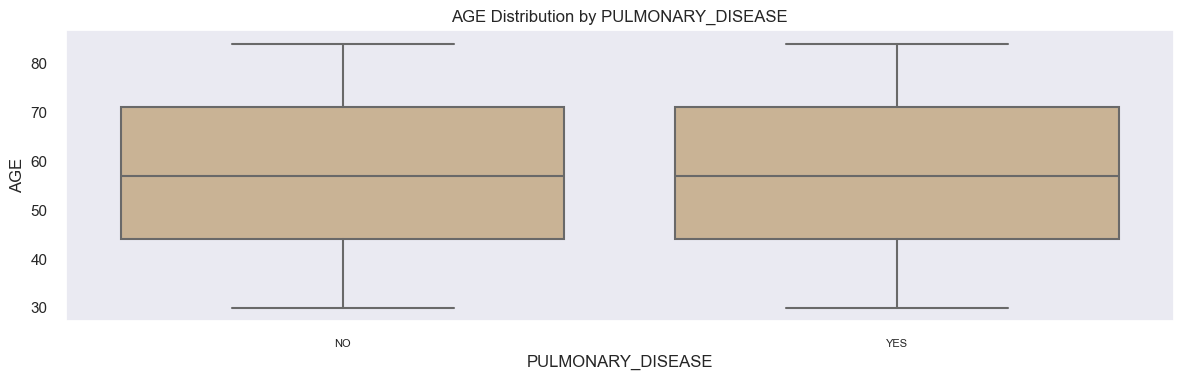

In [2248]:
# Box plot of AGE
sns.boxplot(data= df, x='PULMONARY_DISEASE', y='AGE', color='tan')
plt.title('AGE Distribution by PULMONARY_DISEASE')
plt.xlabel('PULMONARY_DISEASE')
plt.ylabel('AGE')
plt.tight_layout()
plt.xticks(fontsize=8)
sns.set(rc={"figure.figsize":(12,4)})

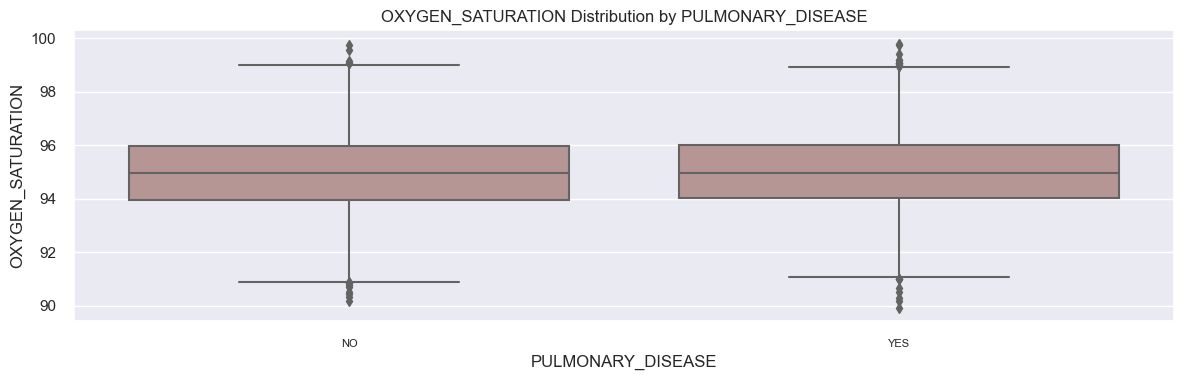

In [2250]:
# Box plot of OXYGEN_SATURATION
sns.boxplot(data= df, x='PULMONARY_DISEASE', y='OXYGEN_SATURATION', color='rosybrown')
plt.title('OXYGEN_SATURATION Distribution by PULMONARY_DISEASE')
plt.xlabel('PULMONARY_DISEASE')
plt.ylabel('OXYGEN_SATURATION')
plt.tight_layout()
plt.xticks(fontsize=8)
sns.set(rc={"figure.figsize":(12,4)})

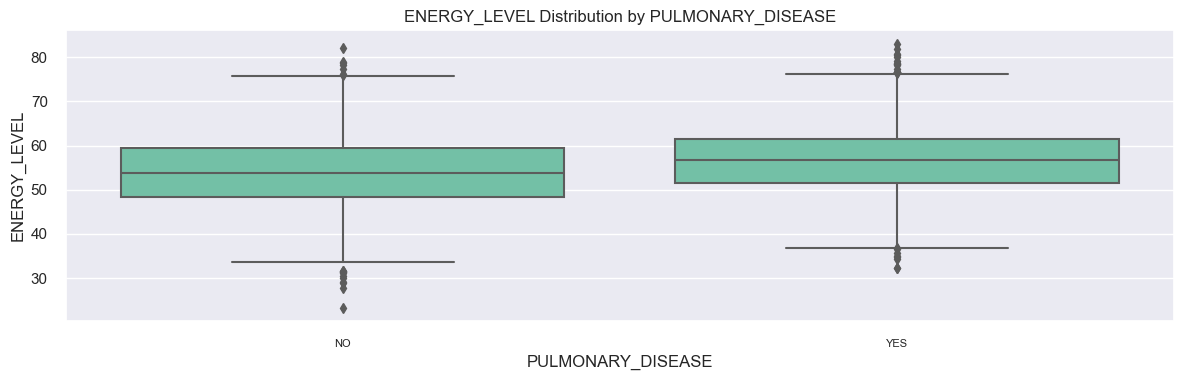

In [2252]:
# Box plot of ENERGY_LEVEL
sns.boxplot(data= df, x='PULMONARY_DISEASE', y='ENERGY_LEVEL', color='mediumaquamarine')
plt.title('ENERGY_LEVEL Distribution by PULMONARY_DISEASE')
plt.xlabel('PULMONARY_DISEASE')
plt.ylabel('ENERGY_LEVEL')
plt.tight_layout()
plt.xticks(fontsize=8)
sns.set(rc={"figure.figsize":(12,4)})

In [2254]:
# Check for target distribution
df['PULMONARY_DISEASE'].value_counts(normalize=True)
# The dataset is balanced

PULMONARY_DISEASE
NO     0.5926
YES    0.4074
Name: proportion, dtype: float64

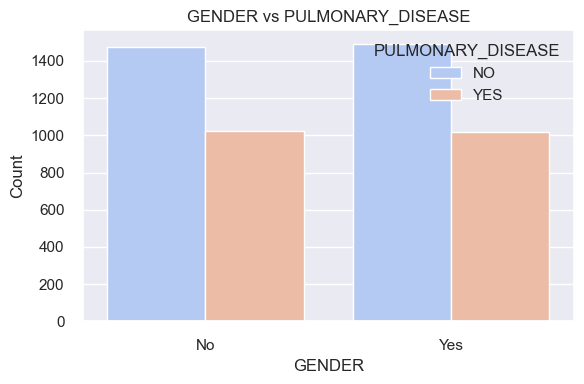

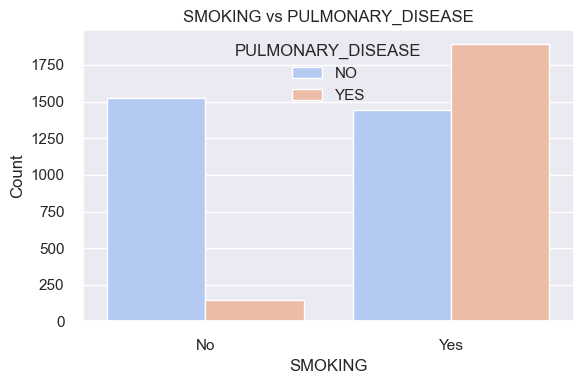

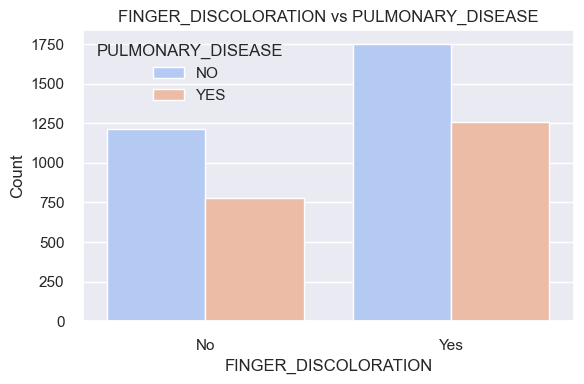

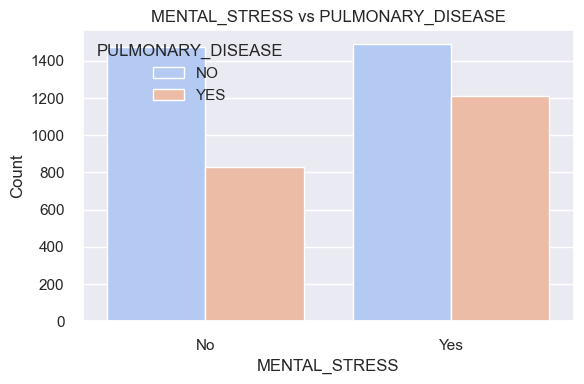

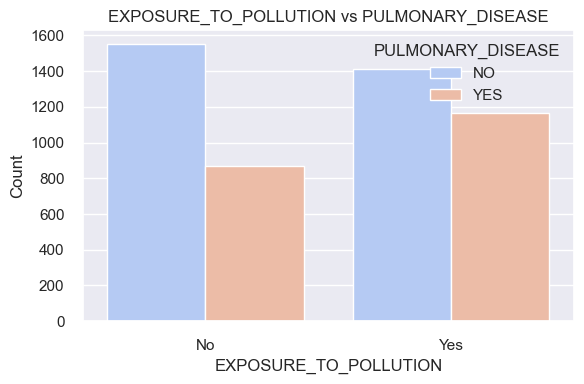

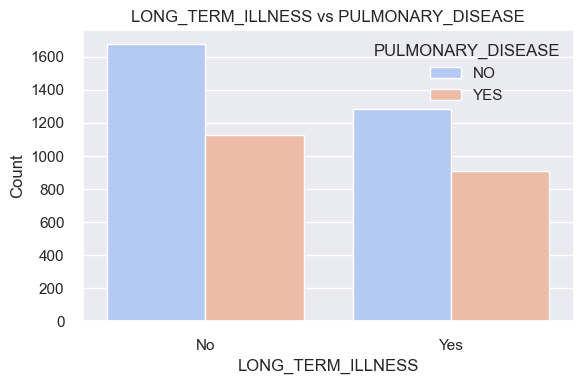

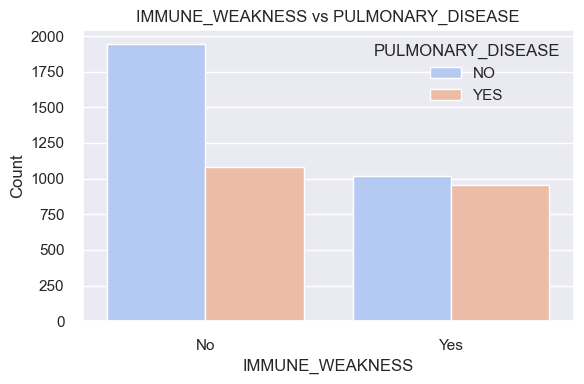

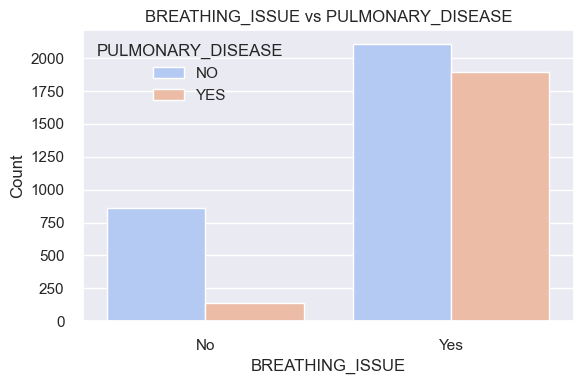

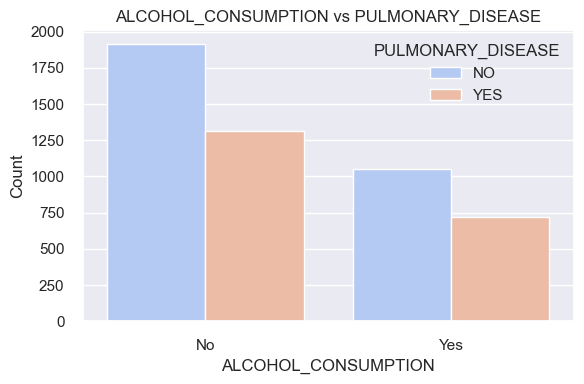

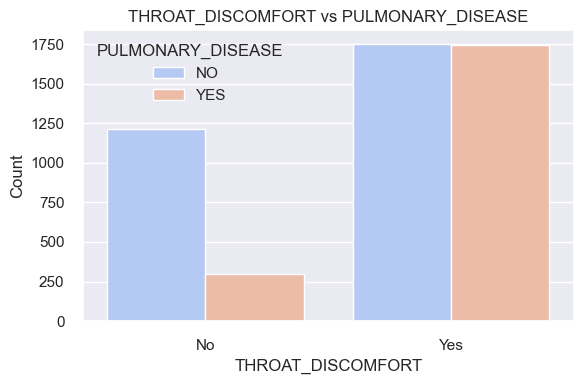

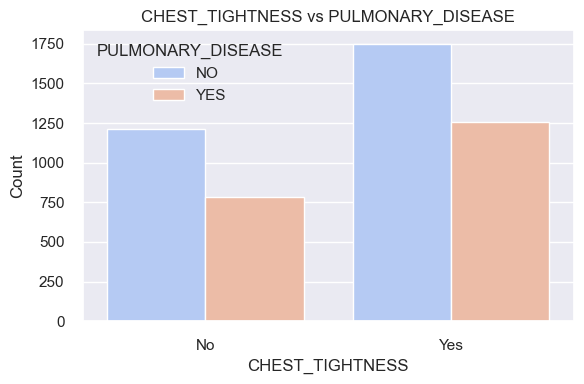

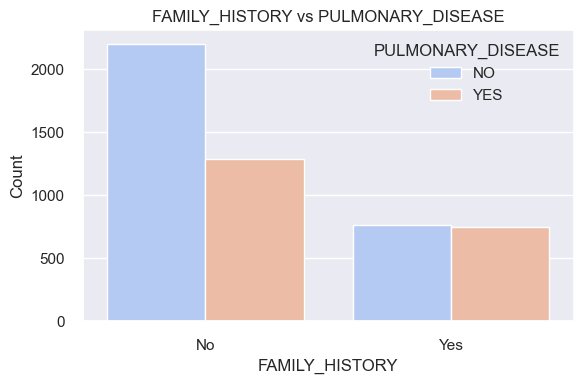

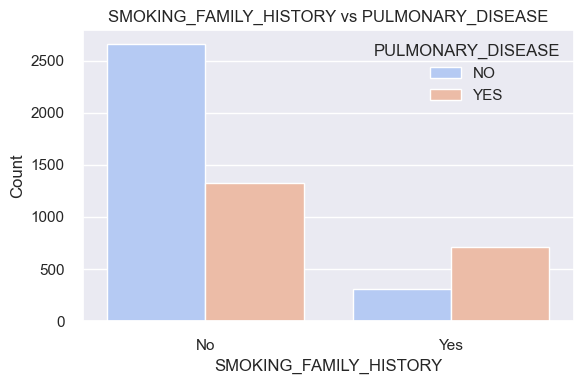

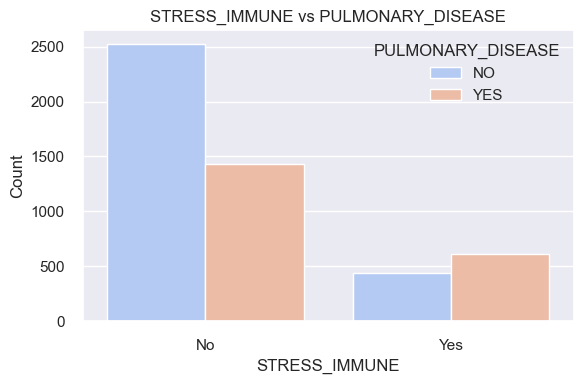

In [2256]:
# Loop over binary predictors to create bargraphs of predictor vs target
# Identify binary columns (except for 'PULMONARY_DISEASE')
binary_columns = [col for col in df.columns if df[col].nunique() == 2 and col != 'PULMONARY_DISEASE']
# Loop
for col in binary_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='PULMONARY_DISEASE', palette='coolwarm')
    plt.title(f'{col} vs PULMONARY_DISEASE')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks([0, 1], ['No', 'Yes'])  # Labeling binary values
    plt.tight_layout()
    plt.show()

## Data Processing

In [2258]:
# Create instance of OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output = False)
encoded_cols = encoder.fit_transform(df[['PULMONARY_DISEASE']])

# get_feature_names_out() returns the transformed feature names
new_df = pd.DataFrame(encoded_cols, columns = encoder.get_feature_names_out(['PULMONARY_DISEASE']))

# Readd column to dataframe
df = df.drop(columns=['PULMONARY_DISEASE']).join(new_df)

df.head()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE_YES
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,0.0
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,1.0
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,0.0
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,1.0
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,1.0


<Axes: >

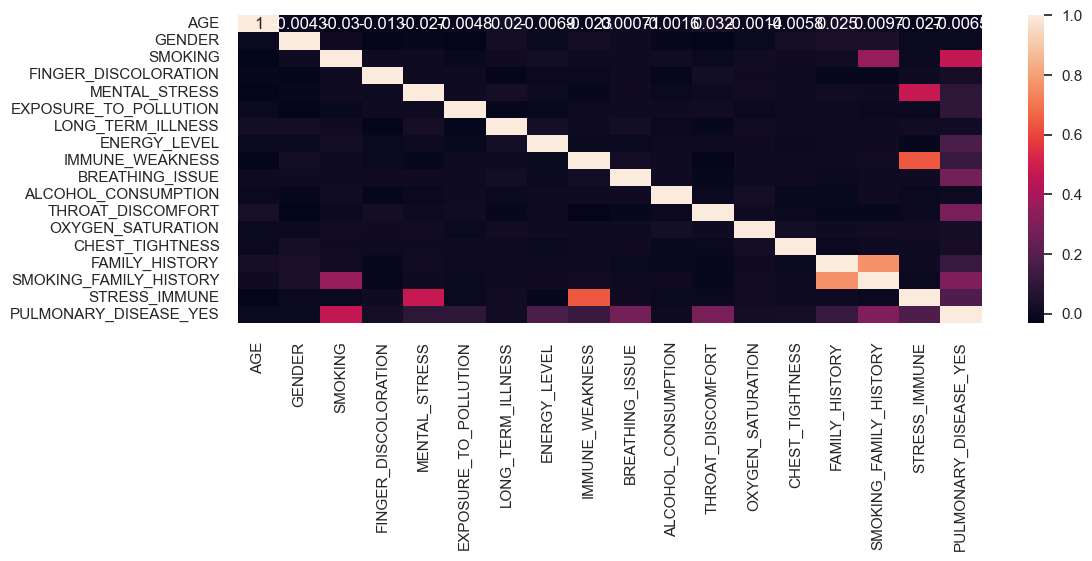

In [2259]:
# Heatmap
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)

In [2260]:
# Correlation matrix
corr_matrix

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE_YES
AGE,1.000000,-0.004262,-0.030163,-0.012559,-0.027137,-0.004834,0.020401,-0.006921,-0.023072,0.000708,-0.001551,0.032412,-0.001354,-0.005792,0.024816,0.009668,-0.027076,-0.006489
GENDER,-0.004262,1.000000,0.010182,-0.020919,-0.014236,-0.024890,0.017220,-0.006845,0.020156,0.006202,-0.015577,-0.031971,-0.006655,0.027683,0.037199,0.037498,-0.000253,-0.004025
SMOKING,-0.030163,0.010182,1.000000,0.005892,0.008839,-0.008753,0.009048,0.018924,0.007399,0.007500,0.013131,-0.002220,0.014124,0.010220,0.013309,0.358182,-0.001446,0.461467
FINGER_DISCOLORATION,-0.012559,-0.020919,0.005892,1.000000,0.001116,0.009729,-0.021592,-0.003429,0.000193,0.010217,-0.015992,0.017094,0.011930,0.000497,-0.012645,-0.012390,0.005963,0.026066
MENTAL_STRESS,-0.027137,-0.014236,0.008839,0.001116,1.000000,0.003466,0.027975,0.002126,-0.014420,0.008755,-0.005022,0.003985,0.014609,0.005719,0.012624,0.006377,0.475476,0.089367
EXPOSURE_TO_POLLUTION,-0.004834,-0.024890,-0.008753,0.009729,0.003466,1.000000,-0.016238,-0.011571,0.003616,0.006977,0.005995,0.012767,-0.000082,0.004455,0.003798,-0.005284,-0.006655,0.095222
LONG_TERM_ILLNESS,0.020401,0.017220,0.009048,-0.021592,0.027975,-0.016238,1.000000,0.020933,0.000840,0.019481,0.000149,-0.015141,0.015301,0.003359,0.007240,0.004016,0.012592,0.012589
ENERGY_LEVEL,-0.006921,-0.006845,0.018924,-0.003429,0.002126,-0.011571,0.020933,1.000000,-0.006170,-0.000905,0.003187,0.002492,0.008761,-0.005799,0.004743,0.011229,-0.012590,0.171479
IMMUNE_WEAKNESS,-0.023072,0.020156,0.007399,0.000193,-0.014420,0.003616,0.000840,-0.006170,1.000000,0.019460,0.004970,-0.026960,0.005463,0.000347,0.008242,0.012493,0.637578,0.124736
BREATHING_ISSUE,0.000708,0.006202,0.007500,0.010217,0.008755,0.006977,0.019481,-0.000905,0.019460,1.000000,0.012023,-0.012205,0.004543,0.010624,-0.004146,0.003219,0.010057,0.270464


In [2261]:
# Correlations with PULMONARY_DISEASE_YES
correlations = corr_matrix.loc['PULMONARY_DISEASE_YES'].drop(['PULMONARY_DISEASE_YES']).sort_values()
correlations

AGE                      -0.006489
GENDER                   -0.004025
ALCOHOL_CONSUMPTION       0.000421
LONG_TERM_ILLNESS         0.012589
OXYGEN_SATURATION         0.018570
FINGER_DISCOLORATION      0.026066
CHEST_TIGHTNESS           0.026244
MENTAL_STRESS             0.089367
EXPOSURE_TO_POLLUTION     0.095222
FAMILY_HISTORY            0.117255
IMMUNE_WEAKNESS           0.124736
ENERGY_LEVEL              0.171479
STRESS_IMMUNE             0.181053
BREATHING_ISSUE           0.270464
THROAT_DISCOMFORT         0.283545
SMOKING_FAMILY_HISTORY    0.302478
SMOKING                   0.461467
Name: PULMONARY_DISEASE_YES, dtype: float64

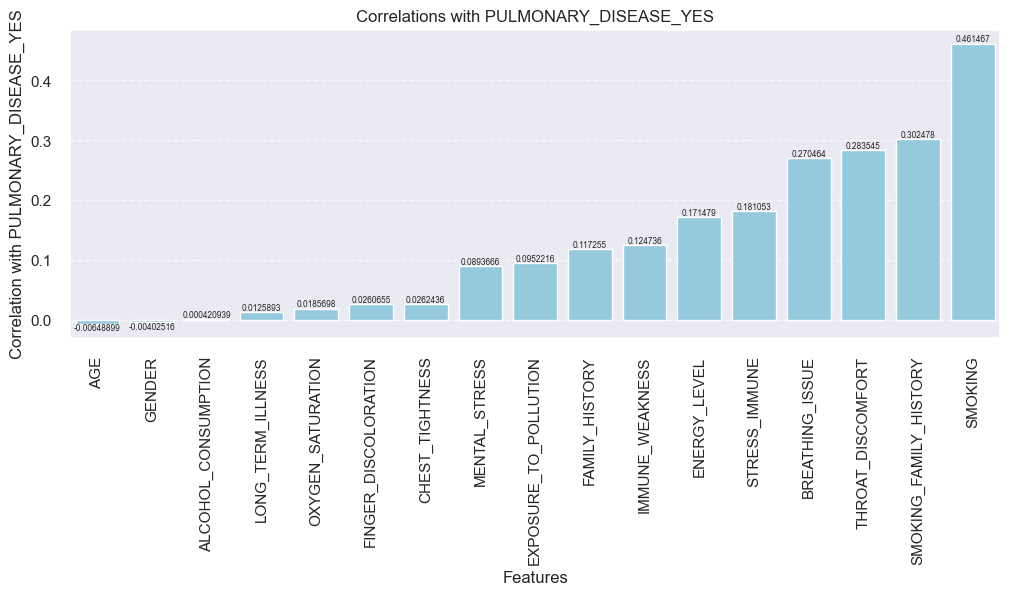

In [2262]:
# Correlation barplot
ax=sns.barplot(x=correlations.index, y=correlations.values, color='skyblue')
plt.xlabel("Features")
plt.ylabel("Correlation with PULMONARY_DISEASE_YES")
ax.bar_label(ax.containers[0], fontsize=6);
plt.title("Correlations with PULMONARY_DISEASE_YES")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Data Modeling

In [2266]:
# Separate the features and the target variable
X = df.drop('PULMONARY_DISEASE_YES', axis=1)
y = df['PULMONARY_DISEASE_YES']

In [2267]:
# Train-test split
# 10% test is enough since the dataset is large
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [2271]:
# Scale the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Logistic Regression

In [2277]:
# Logistic model 1
#create model and fit
log_model=LogisticRegression() 
log_model.fit(scaled_X_train, y_train) 

LogisticRegression()

In [2279]:
log_model.coef_

array([[ 0.01492218, -0.00648886,  1.55664632,  0.04904921, -0.03341817,
         0.39620443, -0.00725569,  0.70866229,  0.01463586,  1.19059197,
        -0.03011462,  1.20345003,  0.04849189,  0.05331494, -0.20100405,
         0.76522261,  0.75551785]])

In [2281]:
#prediction
predict=log_model.predict(scaled_X_test)
predict

array([0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1.

In [2283]:
log_cm = confusion_matrix(y_test, predict)
log_cm

array([[262,  29],
       [ 14, 195]], dtype=int64)

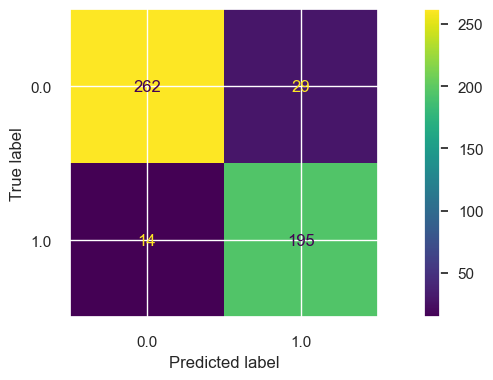

In [2285]:
log_disp=ConfusionMatrixDisplay(log_cm, display_labels=log_model.classes_)
log_disp.plot()
plt.show()

In [2287]:
log_report = classification_report(y_test, predict)
print(log_report)

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92       291
         1.0       0.87      0.93      0.90       209

    accuracy                           0.91       500
   macro avg       0.91      0.92      0.91       500
weighted avg       0.92      0.91      0.91       500



In [2289]:
# SearchGridCV for best value of C
# Or experiment with different solvers
log_model = LogisticRegression(solver='saga',max_iter=5000)

In [2291]:
# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)

In [2293]:
param_grid = {'C': C, 'penalty': penalty}
grid_model = GridSearchCV(log_model,param_grid=param_grid, verbose=1)
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=LogisticRegression(max_iter=5000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [2294]:
grid_model.best_params_

{'C': 1.0, 'penalty': 'l1'}

In [2295]:
log_model2 = OneVsRestClassifier(LogisticRegression(solver='saga', max_iter=5000))

penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

# Use estimator__ to refer to LogisticRegression parameters
param_grid = {'estimator__C': C, 'estimator__penalty': penalty}

# GridSearchCV
grid_model2 = GridSearchCV(log_model2, param_grid=param_grid)
grid_model2.fit(scaled_X_train, y_train)

GridSearchCV(estimator=OneVsRestClassifier(estimator=LogisticRegression(max_iter=5000,
                                                                        solver='saga')),
             param_grid={'estimator__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'estimator__penalty': ['l1', 'l2']})

In [2296]:
grid_model2.best_params_

{'estimator__C': 1.0, 'estimator__penalty': 'l1'}

In [2297]:
# Model Performance
y_pred = grid_model.predict(scaled_X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[262  29]
 [ 14 195]]


In [2298]:
y_pred

array([0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1.

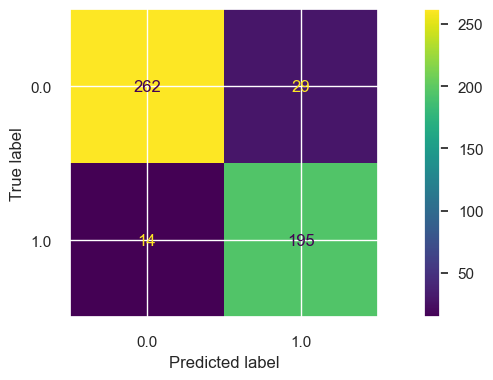

In [2301]:
# Plotting a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm, display_labels=grid_model.classes_)
disp.plot()
plt.show()

In [2302]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92       291
         1.0       0.87      0.93      0.90       209

    accuracy                           0.91       500
   macro avg       0.91      0.92      0.91       500
weighted avg       0.92      0.91      0.91       500



### K-Nearest Neighbors (KNN)

In [2304]:
# Initialize classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
# Fit model
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [2305]:
# Grid search
# Set-up pipeline object
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', KNeighborsClassifier())
])

In [2306]:
# Use GridSearchCV to find optimal params
param_grid = {'classifier__n_neighbors': list(range(1,20)),
              'classifier__weights': ['uniform', 'distance'],
              'classifier__p': np.linspace(1,2,5)}
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')
full_cv_classifier.fit(scaled_X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19],
                         'classifier__p': array([1.  , 1.25, 1.5 , 1.75, 2.  ]),
                         'classifier__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [2311]:
# View best params
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('classifier', KNeighborsClassifier(n_neighbors=10, p=1.5))],
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': KNeighborsClassifier(n_neighbors=10, p=1.5),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__algorithm': 'auto',
 'classifier__leaf_size': 30,
 'classifier__metric': 'minkowski',
 'classifier__metric_params': None,
 'classifier__n_jobs': None,
 'classifier__n_neighbors': 10,
 'classifier__p': 1.5,
 'classifier__weights': 'uniform'}

In [2316]:
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier())])

In [2317]:
# Extract best parameters
best_params = full_cv_classifier.best_estimator_.get_params()
# Update the pipeline with the best parameters
pipe.set_params(**best_params)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=10, p=1.5))])

In [2318]:
pipe.fit(scaled_X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=10, p=1.5))])

In [2319]:
pipe_pred = pipe.predict(scaled_X_test)

In [2320]:
# Classification report
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.88      0.90       291
         1.0       0.84      0.89      0.86       209

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.89      0.88      0.88       500



In [2321]:
# Confusion matrix
confusion_matrix(y_test,pipe_pred)

array([[257,  34],
       [ 24, 185]], dtype=int64)

### Support Vector Machines (SVM)

In [2323]:
# Instanciate SVM model
svm = SVC()

In [2324]:
# Use grid search in attempt to find the best performing model
param_grid = {
    'C': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [1, 2],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(svm, param_grid)
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'degree': [1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [2325]:
# Best accuracy score
grid.best_score_

0.888888888888889

In [2326]:
# Best parameters
grid.best_params_

{'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

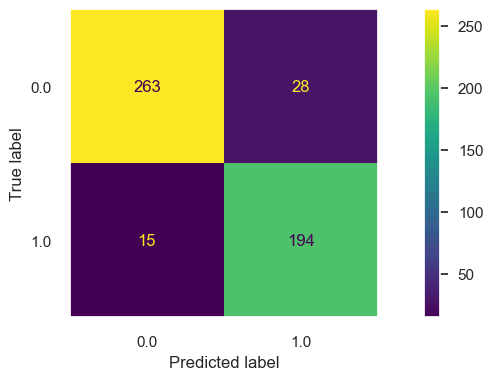

In [2327]:
# Confusion matrix
y_pred = grid.predict(scaled_X_test)
plt.rcParams['axes.grid'] = False
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=grid.classes_)
disp.plot();

In [2328]:
# Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92       291
         1.0       0.87      0.93      0.90       209

    accuracy                           0.91       500
   macro avg       0.91      0.92      0.91       500
weighted avg       0.92      0.91      0.91       500



## Predictions

In [2330]:
# Logistic Regression was chosen
#create and fit final model
final_model=LogisticRegression() 
final_model.fit(scaled_X_train, y_train)
#prediction
final_predict=final_model.predict(scaled_X_test)

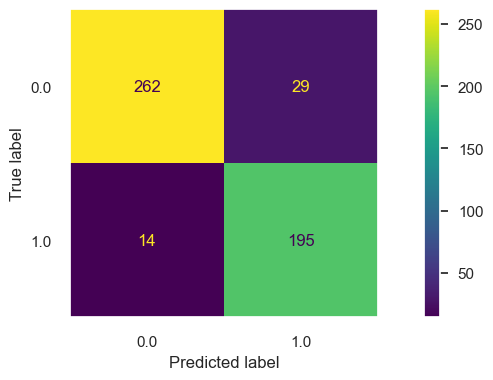

In [2331]:
#Display
final_cm = confusion_matrix(y_test, final_predict)
disp = ConfusionMatrixDisplay(final_cm, display_labels=grid.classes_)
disp.plot();

In [2332]:
df.columns #get the column names

Index(['AGE', 'GENDER', 'SMOKING', 'FINGER_DISCOLORATION', 'MENTAL_STRESS',
       'EXPOSURE_TO_POLLUTION', 'LONG_TERM_ILLNESS', 'ENERGY_LEVEL',
       'IMMUNE_WEAKNESS', 'BREATHING_ISSUE', 'ALCOHOL_CONSUMPTION',
       'THROAT_DISCOMFORT', 'OXYGEN_SATURATION', 'CHEST_TIGHTNESS',
       'FAMILY_HISTORY', 'SMOKING_FAMILY_HISTORY', 'STRESS_IMMUNE',
       'PULMONARY_DISEASE_YES'],
      dtype='object')

In [2333]:
#Predict on my own data
new_data=pd.DataFrame({'AGE': [27], 'GENDER': [0], 'SMOKING': [1], 'FINGER_DISCOLORATION': [0], 'MENTAL_STRESS': [1],
       'EXPOSURE_TO_POLLUTION': [0], 'LONG_TERM_ILLNESS': [1], 'ENERGY_LEVEL': [65],
       'IMMUNE_WEAKNESS': [0], 'BREATHING_ISSUE': [1], 'ALCOHOL_CONSUMPTION': [0],
       'THROAT_DISCOMFORT': [0], 'OXYGEN_SATURATION': [94] , 'CHEST_TIGHTNESS': [1],
       'FAMILY_HISTORY': [0], 'SMOKING_FAMILY_HISTORY': [1], 'STRESS_IMMUNE': [1]})

scaled_new_data = scaler.transform(new_data)

preds = grid.predict(scaled_new_data)
print("PULMONARY_DISEASE_YES:", preds)

PULMONARY_DISEASE_YES: [1.]
